# Logistic Regression Examples


* `LogsiticRegression1.py`: Logistic Regression with a Neural Network mindset
* `LogsiticRegression2.py`: Logistic Regression with a 2-Layered Neural Network
* `LogsiticRegressionN.py`: Logistic Regression with a N-Layered Neural Network
* `utils.py`

Working Environments:
* numpy =  1.14.3
* scipy =  1.0.1
* sklearn =  0.19.1
* matplotlib =  2.2.2


## 1. Logistic Regression with a Neural Network mindset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import version_check, load_dataset_cat, load_dataset_sklearn_moon
from LogisticRegression1 import LogistaicRegression
%matplotlib inline

In [5]:
version_check()

numpy =  1.14.3
scipy =  1.0.1
sklearn =  0.19.1
matplotlib =  2.2.2


### Cat dataset

In [6]:
# load data
train_orig_X, train_Y, test_orig_X, test_Y, classes = load_dataset_cat()
train_orig_X.shape, train_Y.shape, test_orig_X.shape, test_Y.shape, list(classes)

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50), [b'non-cat', b'cat'])

In [7]:
# preprocessing (reshape and normalization)
train_X_flatten = train_orig_X.reshape(train_orig_X.shape[0], -1).T
test_X_flatten = test_orig_X.reshape(test_orig_X.shape[0], -1).T
train_X = train_X_flatten / 255.
test_X = test_X_flatten / 255.

In [8]:
# create the classifier
n_x = train_X.shape[0]
clf = LogisticRegression(n_x, n_epochs=2000, lr=0.005)

In [9]:
# training
clf.fit(train_X, train_Y)

0, cost = 0.6931472
100, cost = 0.5845084
200, cost = 0.4669490
300, cost = 0.3760069
400, cost = 0.3314633
500, cost = 0.3032731
600, cost = 0.2798796
700, cost = 0.2600421
800, cost = 0.2429407
900, cost = 0.2280042
1000, cost = 0.2148195
1100, cost = 0.2030782
1200, cost = 0.1925443
1300, cost = 0.1830333
1400, cost = 0.1743986
1500, cost = 0.1665214
1600, cost = 0.1593045
1700, cost = 0.1526673
1800, cost = 0.1465422
1900, cost = 0.1408721


In [10]:
# evaluation for training and test set
clf.evaluate(train_X, train_Y)
clf.evaluate(test_X, test_Y)

Accuracy: 99.0430622%
Accuracy: 70.0000000%


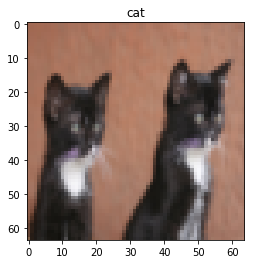

In [11]:
# prediction
test_image_idx = 0
test_image = test_X[:, test_image_idx].reshape(test_X.shape[0], 1)  # (n_x, m=1)
test_label = clf.predict(test_image)  # (1, m=1)
test_label = int(np.squeeze(test_label)) # [[1.]] --> 1
plt.title(classes[test_label].decode('utf-8'))
plt.imshow(test_X[:, test_image_idx].reshape(64, 64, 3))

### Moon dataset

In [12]:
train_X, train_Y = load_dataset_sklearn_moon()
train_X.shape, train_Y.shape

((2, 300), (1, 300))

In [13]:
n_x = train_X.shape[0]
clf = LogisticRegression(n_x, n_epochs=2000, lr=0.005)

In [14]:
clf.fit(train_X, train_Y)

0, cost = 0.6931472
100, cost = 0.6504297
200, cost = 0.6155113
300, cost = 0.5866286
400, cost = 0.5624577
500, cost = 0.5420073
600, cost = 0.5245309
700, cost = 0.5094602
800, cost = 0.4963571
900, cost = 0.4848802
1000, cost = 0.4747598
1100, cost = 0.4657805
1200, cost = 0.4577687
1300, cost = 0.4505831
1400, cost = 0.4441074
1500, cost = 0.4382456
1600, cost = 0.4329175
1700, cost = 0.4280559
1800, cost = 0.4236039
1900, cost = 0.4195133


In [15]:
clf.evaluate(train_X, train_Y)

Accuracy: 81.0000000%


**Another try to improve the accuracy**

In [16]:
clf10000 = LogisticRegression(n_x, n_epochs=10000, lr=0.005)
clf10000.fit(train_X, train_Y)
clf10000.evaluate(train_X, train_Y)

0, cost = 0.6931472
100, cost = 0.6504297
200, cost = 0.6155113
300, cost = 0.5866286
400, cost = 0.5624577
500, cost = 0.5420073
600, cost = 0.5245309
700, cost = 0.5094602
800, cost = 0.4963571
900, cost = 0.4848802
1000, cost = 0.4747598
1100, cost = 0.4657805
1200, cost = 0.4577687
1300, cost = 0.4505831
1400, cost = 0.4441074
1500, cost = 0.4382456
1600, cost = 0.4329175
1700, cost = 0.4280559
1800, cost = 0.4236039
1900, cost = 0.4195133
2000, cost = 0.4157427
2100, cost = 0.4122569
2200, cost = 0.4090252
2300, cost = 0.4060213
2400, cost = 0.4032220
2500, cost = 0.4006073
2600, cost = 0.3981596
2700, cost = 0.3958633
2800, cost = 0.3937047
2900, cost = 0.3916718
3000, cost = 0.3897537
3100, cost = 0.3879409
3200, cost = 0.3862248
3300, cost = 0.3845976
3400, cost = 0.3830526
3500, cost = 0.3815834
3600, cost = 0.3801846
3700, cost = 0.3788509
3800, cost = 0.3775779
3900, cost = 0.3763613
4000, cost = 0.3751974
4100, cost = 0.3740827
4200, cost = 0.3730140
4300, cost = 0.3719884


## 2. Logistic Regression with a 2-Layered Neural Network

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from utils import version_check, load_dataset_cat, load_dataset_sklearn_moon, load_dataset_planar
from utils import plot_decision_boundary
from LogisticRegression2 import LogisticRegression
%matplotlib inline

### Planar dataset

In [18]:
train_X, train_Y = load_dataset_planar()
train_X.shape, train_Y.shape

((2, 400), (1, 400))

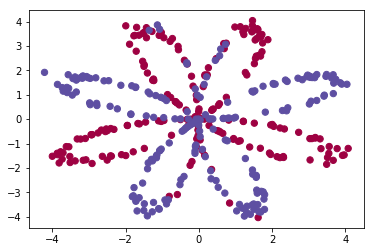

In [19]:
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y.ravel().tolist(), s=40, cmap=plt.cm.Spectral)

In [20]:
# NN with 2-layer of (n_x, 4, 1)
n_x = train_X.shape[0]
n_h = 4
n_y = train_Y.shape[0]

clf = LogisticRegression(n_x, n_h, n_y, n_epochs=10000, lr=1.2)

In [21]:
clf.fit(train_X, train_Y)

0, cost = 0.693048
500, cost = 0.304722
1000, cost = 0.288083
1500, cost = 0.278875
2000, cost = 0.254385
2500, cost = 0.240464
3000, cost = 0.233864
3500, cost = 0.229744
4000, cost = 0.226792
4500, cost = 0.224505
5000, cost = 0.222644
5500, cost = 0.221079
6000, cost = 0.219731
6500, cost = 0.218550
7000, cost = 0.217504
7500, cost = 0.216570
8000, cost = 0.219550
8500, cost = 0.219051
9000, cost = 0.218633
9500, cost = 0.218257


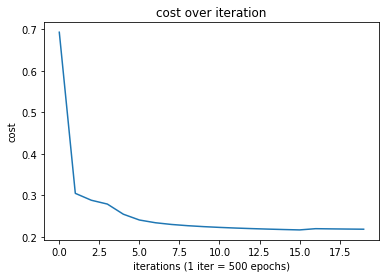

In [23]:
clf.report_cost()

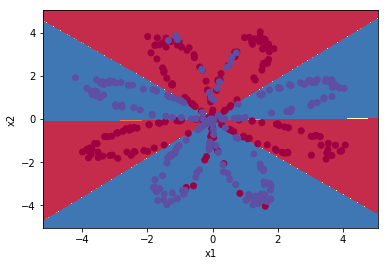

In [24]:
plot_decision_boundary(lambda x: clf.predict(x.T), train_X, train_Y)

### Cat dataset

In [26]:
train_orig_X, train_Y, test_orig_X, test_Y, classes = load_dataset_cat()
train_orig_X.shape, train_Y.shape, test_orig_X.shape, test_Y.shape, list(classes)

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50), [b'non-cat', b'cat'])

In [27]:
train_X_flatten = train_orig_X.reshape(train_orig_X.shape[0], -1).T
test_X_flatten = test_orig_X.reshape(test_orig_X.shape[0], -1).T
train_X = train_X_flatten / 255.
test_X = test_X_flatten / 255.

In [28]:
# [n_x, 10, 1]
n_x = train_X.shape[0]
n_h = 10
n_y = 1

In [29]:
clf = LogisticRegression(n_x, n_h, n_y, n_epochs=10000, lr=0.005)
clf.fit(train_X, train_Y)

0, cost = 0.693045
500, cost = 0.626272
1000, cost = 0.501452
1500, cost = 0.327101
2000, cost = 0.189873
2500, cost = 0.111184
3000, cost = 0.071757
3500, cost = 0.050275
4000, cost = 0.037563
4500, cost = 0.029454
5000, cost = 0.023945
5500, cost = 0.020023
6000, cost = 0.017118
6500, cost = 0.014896
7000, cost = 0.013148
7500, cost = 0.011741
8000, cost = 0.010588
8500, cost = 0.009627
9000, cost = 0.008816
9500, cost = 0.008123


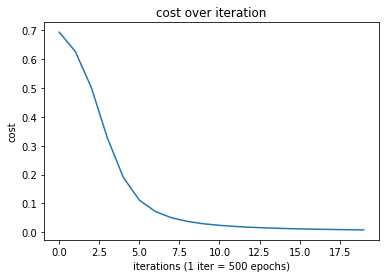

In [30]:
clf.report_cost()

In [31]:
clf.evaluate(train_X, train_Y)
clf.evaluate(test_X, test_Y)

Accuracy = 100.00%
Accuracy = 70.00%


**2-nd try**

In [32]:
clf1 = LogisticRegression(n_x, n_h, n_y, n_epochs=5000, lr=0.1)
clf1.fit(train_X, train_Y)

0, cost = 0.693045
250, cost = 0.533302
500, cost = 0.447676
750, cost = 0.389828
1000, cost = 0.360013
1250, cost = 0.479505
1500, cost = 0.423318
1750, cost = 0.487053
2000, cost = 0.541330
2250, cost = 0.146891
2500, cost = 0.127307
2750, cost = 0.123659
3000, cost = 0.121755
3250, cost = 0.113822
3500, cost = 0.112688
3750, cost = 0.101272
4000, cost = 0.099779
4250, cost = 0.099175
4500, cost = 0.098641
4750, cost = 0.096871


In [33]:
clf1.evaluate(train_X, train_Y)
clf1.evaluate(test_X, test_Y)

Accuracy = 95.69%
Accuracy = 66.00%


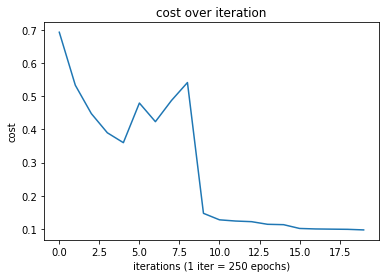

In [34]:
clf1.report_cost()

**3-rd try**

In [35]:
clf2 = LogisticRegression(n_x, 5, n_y, n_epochs=5000, lr=0.01)
clf2.fit(train_X, train_Y)

0, cost = 0.692496
250, cost = 0.629681
500, cost = 0.527598
750, cost = 0.444716
1000, cost = 0.338262
1250, cost = 0.199210
1500, cost = 0.202217
1750, cost = 0.100859
2000, cost = 0.075872
2250, cost = 0.060063
2500, cost = 0.049098
2750, cost = 0.041366
3000, cost = 0.035691
3250, cost = 0.031395
3500, cost = 0.027933
3750, cost = 0.025159
4000, cost = 0.022979
4250, cost = 0.021182
4500, cost = 0.019658
4750, cost = 0.018337


In [36]:
clf2.evaluate(train_X, train_Y)
clf2.evaluate(test_X, test_Y)

Accuracy = 99.52%
Accuracy = 70.00%


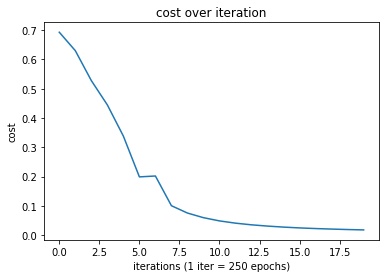

In [37]:
clf2.report_cost()

### Moon dataset

In [38]:
train_X, train_Y = load_dataset_sklearn_moon()
train_X.shape, train_Y.shape

((2, 300), (1, 300))

In [39]:
n_x = train_X.shape[0]
n_h = 4
n_y = 1
clf2000 = LogisticRegression(n_x, n_h, n_y, n_epochs=2000, lr=0.005)

In [40]:
clf2000.fit(train_X, train_Y)

0, cost = 0.692998
100, cost = 0.692909
200, cost = 0.692798
300, cost = 0.692653
400, cost = 0.692462
500, cost = 0.692206
600, cost = 0.691863
700, cost = 0.691399
800, cost = 0.690774
900, cost = 0.689932
1000, cost = 0.688799
1100, cost = 0.687281
1200, cost = 0.685257
1300, cost = 0.682575
1400, cost = 0.679050
1500, cost = 0.674470
1600, cost = 0.668599
1700, cost = 0.661201
1800, cost = 0.652073
1900, cost = 0.641080


In [41]:
clf2000.evaluate(train_X, train_Y)

Accuracy = 79.00%


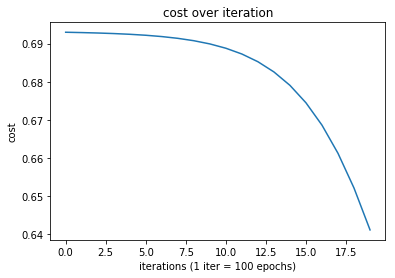

In [42]:
clf2000.report_cost()

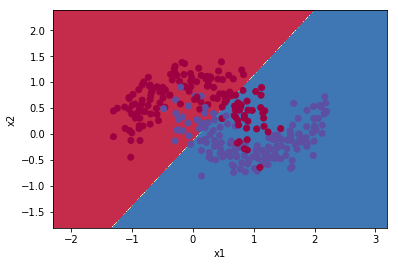

In [43]:
plot_decision_boundary(lambda x: clf2000.predict(x.T), train_X, train_Y)

**2nd experiment**

In [44]:
n_x = train_X.shape[0]
n_h = 4
n_y = 1
clf10000 = LogisticRegression(n_x, n_h, n_y, n_epochs=10000, lr=0.005)
clf10000.fit(train_X, train_Y)

0, cost = 0.692998
500, cost = 0.692206
1000, cost = 0.688799
1500, cost = 0.674470
2000, cost = 0.628203
2500, cost = 0.544795
3000, cost = 0.467819
3500, cost = 0.419350
4000, cost = 0.390846
4500, cost = 0.373056
5000, cost = 0.361203
5500, cost = 0.353014
6000, cost = 0.347294
6500, cost = 0.343305
7000, cost = 0.340539
7500, cost = 0.338631
8000, cost = 0.337315
8500, cost = 0.336408
9000, cost = 0.335780
9500, cost = 0.335343


Accuracy = 85.67%


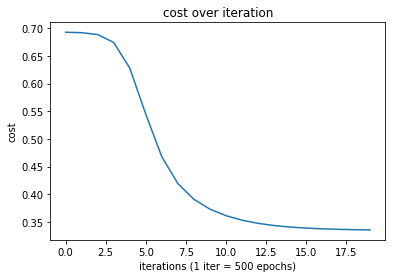

In [45]:
clf10000.evaluate(train_X, train_Y)
clf10000.report_cost()

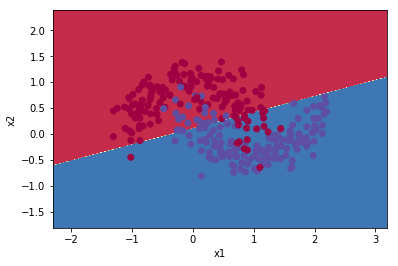

In [46]:
plot_decision_boundary(lambda x: clf10000.predict(x.T), train_X, train_Y)

**3rd experiment**

In [48]:
n_x = train_X.shape[0]
n_h = 4
n_y = 1
clf10000_01 = LogisticRegression(n_x, n_h, n_y, n_epochs=2000, lr=1.2)
clf10000_01.fit(train_X, train_Y)

0, cost = 0.692998
100, cost = 0.333912
200, cost = 0.333422
300, cost = 0.333123
400, cost = 0.332882
500, cost = 0.332642
600, cost = 0.332358
700, cost = 0.331973
800, cost = 0.331361
900, cost = 0.330105
1000, cost = 0.326791
1100, cost = 0.315019
1200, cost = 0.171949
1300, cost = 0.149489
1400, cost = 0.144097
1500, cost = 0.141338
1600, cost = 0.139385
1700, cost = 0.137878
1800, cost = 0.136699
1900, cost = 0.135757


Accuracy = 94.00%


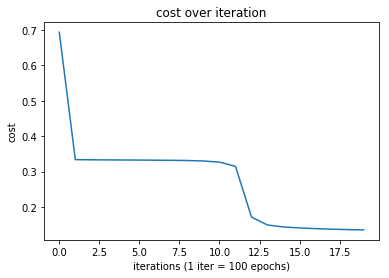

In [49]:
clf10000_01.evaluate(train_X, train_Y)
clf10000_01.report_cost()

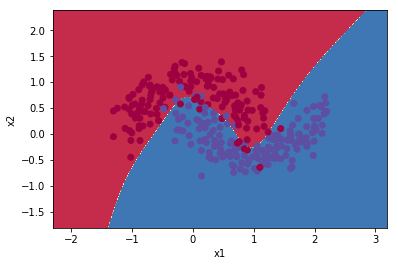

In [50]:
plot_decision_boundary(lambda x: clf10000_01.predict(x.T), train_X, train_Y)

## 3. Logistic Regression with a N-Layered Neural Network

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from utils import version_check, load_dataset_cat, load_dataset_sklearn_moon, load_dataset_planar
from utils import plot_decision_boundary, print_mislabeled_images
from LogisticRegressionN import LogisticRegression
%matplotlib inline

### Cat dataset

In [54]:
train_orig_X, train_Y, test_orig_X, test_Y, classes = load_dataset_cat()
train_orig_X.shape, train_Y.shape, test_orig_X.shape, test_Y.shape, list(classes)

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50), [b'non-cat', b'cat'])

y = 0. It's a non-cat picture.


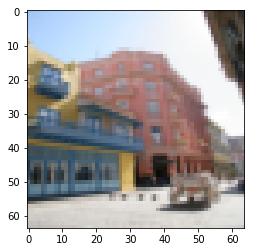

In [55]:
index = 23
plt.imshow(train_orig_X[index])
print("y = " + str(train_Y[0, index]) + ". It's a " + classes[train_Y[0, index]].decode("utf-8") + " picture.")
plt.show()

In [56]:
# flatten images
train_X_flatten = train_orig_X.reshape(train_orig_X.shape[0], -1).T
test_X_flatten = test_orig_X.reshape(test_orig_X.shape[0], -1).T

# normalization
train_X = train_X_flatten / 255.
test_X = test_X_flatten / 255.

In [57]:
n_x = train_X.shape[0]
layer_dims = [train_X.shape[0], 20, 7, 5, 1]

In [58]:
clf = LogisticRegression(layer_dims, lr=0.0075, n_epochs=2500)

0, cost = 0.771749
100, cost = 0.672053
200, cost = 0.648263
300, cost = 0.611507
400, cost = 0.567047
500, cost = 0.540138
600, cost = 0.527930
700, cost = 0.465477
800, cost = 0.369126
900, cost = 0.391747
1000, cost = 0.315187
1100, cost = 0.272700
1200, cost = 0.237419
1300, cost = 0.199601
1400, cost = 0.189263
1500, cost = 0.161189
1600, cost = 0.148214
1700, cost = 0.137775
1800, cost = 0.129740
1900, cost = 0.121225
2000, cost = 0.113821
2100, cost = 0.107839
2200, cost = 0.102855
2300, cost = 0.100897
2400, cost = 0.092878


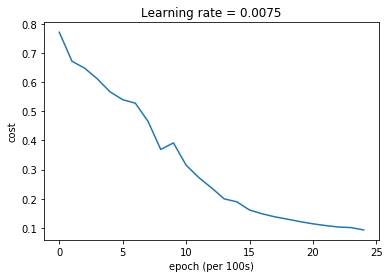

In [59]:
clf.fit(train_X, train_Y)
clf.plot_cost()

In [60]:
clf.evaluate(train_X, train_Y)
clf.evaluate(test_X, test_Y)

Accuracy = 98.56%
Accuracy = 80.00%


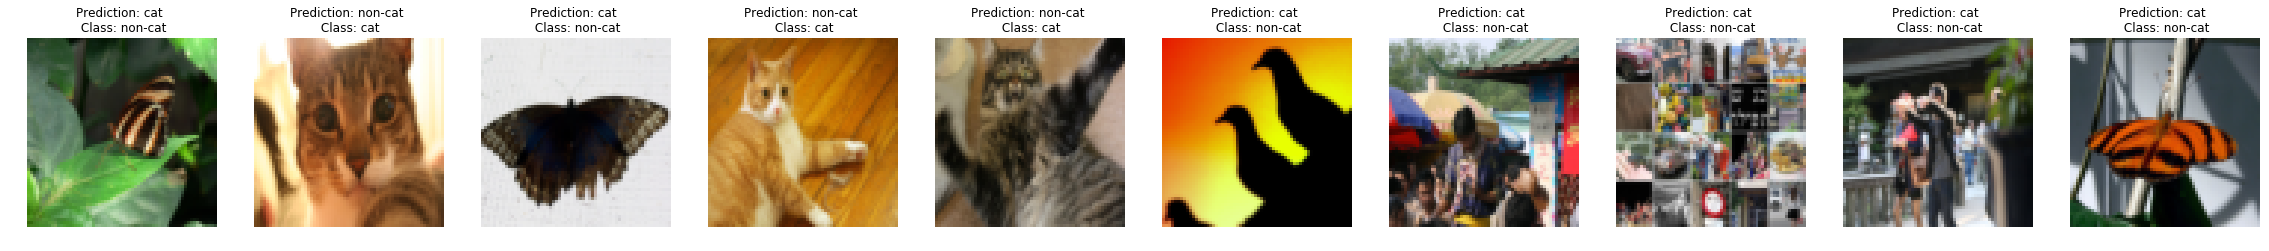

In [61]:
Y_pred = clf.predict(test_X)
print_mislabeled_images(classes, test_X, test_Y, Y_pred)

### Moon dataset

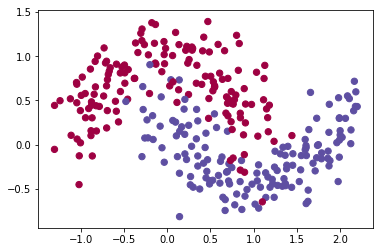

(2, 300) (1, 300)


In [62]:
train_X, train_Y = load_dataset_sklearn_moon(True)

In [63]:
layer_dims = [train_X.shape[0], 4, 1]

In [64]:
clf = LogisticRegression(layer_dims, lr=1.2, n_epochs=2000, step_size=100)

0, cost = 0.822373
100, cost = 0.272401
200, cost = 0.202885
300, cost = 0.158903
400, cost = 0.148532
500, cost = 0.145355
600, cost = 0.143279
700, cost = 0.142424
800, cost = 0.141826
900, cost = 0.141491
1000, cost = 0.141002
1100, cost = 0.140803
1200, cost = 0.140616
1300, cost = 0.140406
1400, cost = 0.140338
1500, cost = 0.140288
1600, cost = 0.140251
1700, cost = 0.140166
1800, cost = 0.140112
1900, cost = 0.140062


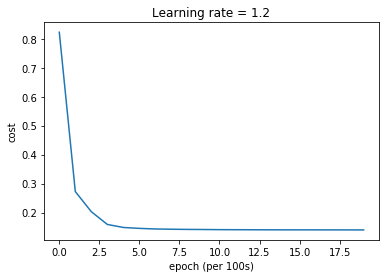

In [65]:
clf.fit(train_X, train_Y)
clf.plot_cost()

In [66]:
clf.evaluate(train_X, train_Y)

Accuracy = 93.67%


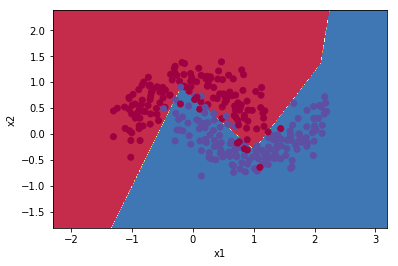

In [67]:
plot_decision_boundary(lambda x: clf.predict(x.T), train_X, train_Y)